Decide which metrics(attributes) to use to assess the best team performance in the regular season. These don’t have to be backed by hard-evidence, but try to use some simple graphs to show the relation between a metric and a team's win percentage. For instance, the  Pearson R metric should be able to accomplish this. 

Resource: https://www.teamrankings.com/nba/stats/ 

#### What does Pearson R Mean? 

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
import matplotlib.pyplot as plt

Metric #1: Effective Field Goal Percentage (eFG%)

In [5]:
# Comparing efG to win%, from 2016 - 2024

# use .. to go back a directory
efg_dir = '../TeamMetrics/efg_pct'
win_pct_dir = '../TeamMetrics/win_pct'

teams = [f.split('.')[0] for f in os.listdir(efg_dir) if f.endswith('.csv')]

efg_data = pd.DataFrame()

#Combine efg and win percentage data
for team in teams:
    efg_file = os.path.join(efg_dir, f'{team}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'{team}.csv')

    efg_team = pd.read_csv(efg_file)
    win_pct_team = pd.read_csv(win_pct_file)

    # Verify statistic and year exist
    efg_team = efg_team[['Year', 'Statistic']].rename(columns={'Statistic': 'efg'})
    win_pct_team = win_pct_team[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes efg and win_pct on 'Year'
    # inner join for rows with common values in 'Year'
    combined = pd.merge(efg_team, win_pct_team, on='Year', how='inner')
    combined['Team'] = team  # Add team identifier

    # combined data
    efg_data = pd.concat([efg_data, combined], ignore_index=True)
    
print(efg_data.head(5)) # verify the data is correct.


# Pearson correlation coefficient
correlation = efg_data['efg'].corr(efg_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year    efg  win_pct    Team
0  2018  0.536    0.561  Denver
1  2007  0.498    0.529  Denver
2  2012  0.510    0.562  Denver
3  2023  0.570    0.677  Denver
4  2022  0.555    0.563  Denver
Pearson Correlation Coefficient: 0.44947


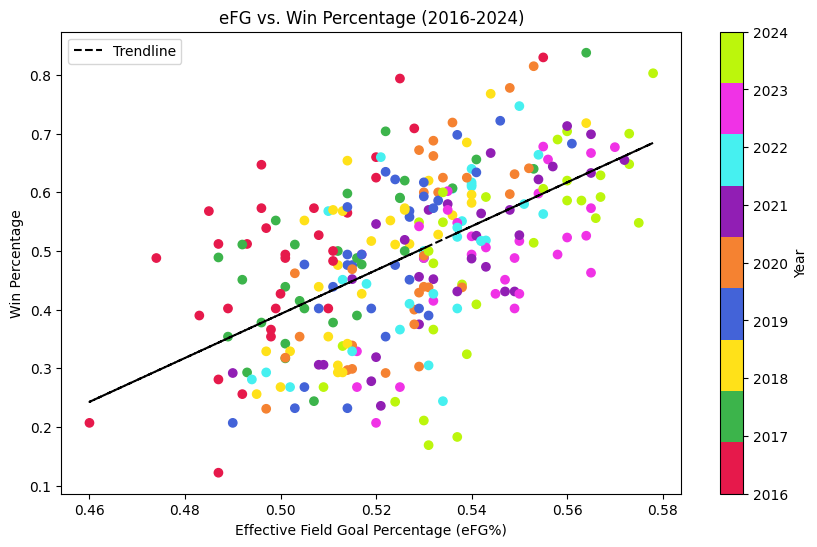

In [18]:


# Filter data for years 2016-2024 (three point revolution)
efg_data = efg_data[efg_data['Year'].between(2016, 2024)]

# Create a list of colors for each yeear
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(efg_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(efg_data['Year'].unique()))}
efg_data['year_color'] = efg_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    efg_data['efg'], 
    efg_data['win_pct'], 
    c=efg_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(efg_data['efg'], efg_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(efg_data['efg'], p(efg_data['efg']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Effective Field Goal Percentage (eFG%)')
plt.ylabel('Win Percentage')
plt.title('eFG vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to beter see the trendline
plt.legend()
plt.show()

In [24]:
# Comparing Opponent efg to win%, from 2016 - 2024

# use .. to go back a directory
opponent_efg_dir = '../TeamMetrics/opponent_efg_pct'
win_pct_dir = '../TeamMetrics/win_pct'

teams = [f.split('.')[0] for f in os.listdir(opponent_efg_dir) if f.endswith('.csv')]

opponent_efg_data = pd.DataFrame()

#Combine opponent efg and win percentage data
for team in teams:
    opponent_efg_file = os.path.join(opponent_efg_dir, f'{team}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'{team}.csv')

    opposing_efg_team = pd.read_csv(opponent_efg_file)
    win_pct_team = pd.read_csv(win_pct_file)

    # Verify statistic and year exist
    opposing_efg_team = opposing_efg_team[['Year', 'Statistic']].rename(columns={'Statistic': 'opponent efg'})
    win_pct_team = win_pct_team[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes opponent efg and win_pct on 'Year'
    # inner join for rows with common values in 'Year'
    combined = pd.merge(opposing_efg_team, win_pct_team, on='Year', how='inner')
    combined['Team'] = team  # Add team identifier

    # combined data
    opponent_efg_data = pd.concat([opponent_efg_data, combined], ignore_index=True)
    
print(opponent_efg_data.head(5)) # verify the data is correct.


# Pearson correlation coefficient
correlation = opponent_efg_data['opponent efg'].corr(opponent_efg_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  opponent efg  win_pct    Team
0  2023         0.538    0.677  Denver
1  2015         0.504    0.366  Denver
2  2012         0.503    0.562  Denver
3  2010         0.498    0.625  Denver
4  2024         0.529    0.704  Denver
Pearson Correlation Coefficient: -0.40874


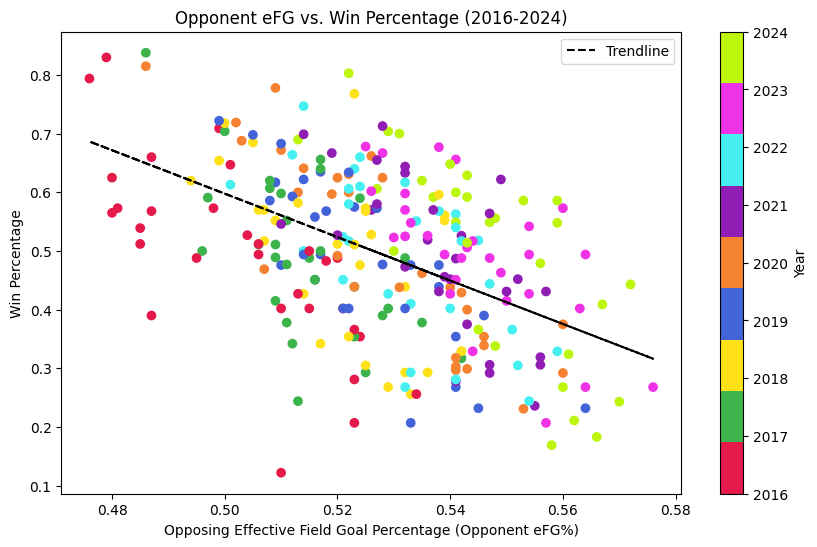

In [25]:
# Filter data for years 2016-2024 (three point revolution)
opponent_efg_data = opponent_efg_data[opponent_efg_data['Year'].between(2016, 2024)]

# Create a list of colors for each yeear
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(opponent_efg_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(opponent_efg_data['Year'].unique()))}
opponent_efg_data['year_color'] = opponent_efg_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    opponent_efg_data['opponent efg'], 
    opponent_efg_data['win_pct'], 
    c=opponent_efg_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(opponent_efg_data['opponent efg'], opponent_efg_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(opponent_efg_data['opponent efg'], p(opponent_efg_data['opponent efg']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Opposing Effective Field Goal Percentage (Opponent eFG%)')
plt.ylabel('Win Percentage')
plt.title('Opponent eFG vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to beter see the trendline
plt.legend()
plt.show()

In [28]:
# Comparing defense efficiency to win%, from 2016 - 2024

# use .. to go back a directory
def_eff_dir = '../TeamMetrics/defensive_efficiency'
win_pct_dir = '../TeamMetrics/win_pct'

teams = [f.split('.')[0] for f in os.listdir(def_eff_dir) if f.endswith('.csv')]

def_eff_data = pd.DataFrame()

#Combine defensive efficiency and win percentage data
for team in teams:
    def_eff_file = os.path.join(def_eff_dir, f'{team}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'{team}.csv')

    def_eff_team = pd.read_csv(def_eff_file)
    win_pct_team = pd.read_csv(win_pct_file)

    # Verify statistic and year exist
    def_eff_team = def_eff_team[['Year', 'Statistic']].rename(columns={'Statistic': 'def efficiency'})
    win_pct_team = win_pct_team[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes def efficiency and win_pct on 'Year'
    # inner join for rows with common values in 'Year'
    combined = pd.merge(def_eff_team, win_pct_team, on='Year', how='inner')
    combined['Team'] = team  # Add team identifier

    # combined data
    def_eff_data = pd.concat([def_eff_data, combined], ignore_index=True)
    
print(def_eff_data.head(5)) # verify the data is correct.


# Pearson correlation coefficient
correlation = def_eff_data['def efficiency'].corr(def_eff_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  def efficiency  win_pct    Team
0  2016           1.052    0.402  Denver
1  2012           1.026    0.562  Denver
2  2015           1.044    0.366  Denver
3  2020           1.061    0.662  Denver
4  2011           1.039    0.586  Denver
Pearson Correlation Coefficient: -0.47714


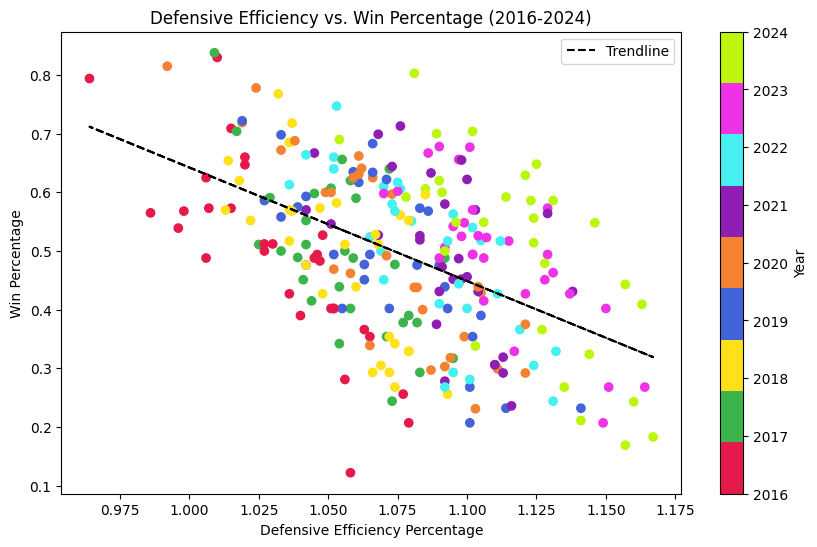

In [33]:
# Filter data for years 2016-2024 (three point revolution)
def_eff_data = def_eff_data[def_eff_data['Year'].between(2016, 2024)]

# Create a list of colors for each yeear
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(def_eff_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(def_eff_data['Year'].unique()))}
def_eff_data['year_color'] = def_eff_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    def_eff_data['def efficiency'], 
    def_eff_data['win_pct'], 
    c=def_eff_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(def_eff_data['def efficiency'], def_eff_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(def_eff_data['def efficiency'], p(def_eff_data['def efficiency']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Efficiency Percentage')
plt.ylabel('Win Percentage')
plt.title('Defensive Efficiency vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to beter see the trendline
plt.legend()
plt.show()

In [34]:
# Comparing avg scoring margin to win%, from 2016 - 2024

# use .. to go back a directory
avg_scr_mgn_dir = '../TeamMetrics/average_scoring_margin'
win_pct_dir = '../TeamMetrics/win_pct'

teams = [f.split('.')[0] for f in os.listdir(avg_scr_mgn_dir) if f.endswith('.csv')]

avg_scr_mgn_data = pd.DataFrame()

#Combine avg scoring margin and win percentage data
for team in teams:
    avg_scr_mgn_file = os.path.join(avg_scr_mgn_dir, f'{team}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'{team}.csv')

    avg_scr_mgn_team = pd.read_csv(avg_scr_mgn_file)
    win_pct_team = pd.read_csv(win_pct_file)

    # Verify statistic and year exist
    avg_scr_mgn_team = avg_scr_mgn_team[['Year', 'Statistic']].rename(columns={'Statistic': 'avg scoring margin'})
    win_pct_team = win_pct_team[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes avg scoring margin and win_pct on 'Year'
    # inner join for rows with common values in 'Year'
    combined = pd.merge(avg_scr_mgn_team, win_pct_team, on='Year', how='inner')
    combined['Team'] = team  # Add team identifier

    # combined data
    avg_scr_mgn_data = pd.concat([avg_scr_mgn_data, combined], ignore_index=True)
    
print(avg_scr_mgn_data.head(5)) # verify the data is correct.


# Pearson correlation coefficient
correlation = avg_scr_mgn_data['avg scoring margin'].corr(avg_scr_mgn_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  avg scoring margin  win_pct    Team
0  2017                 0.5    0.488  Denver
1  2005                 1.3    0.575  Denver
2  2024                 4.5    0.704  Denver
3  2023                 4.3    0.677  Denver
4  2020                 3.0    0.662  Denver
Pearson Correlation Coefficient: 0.96542


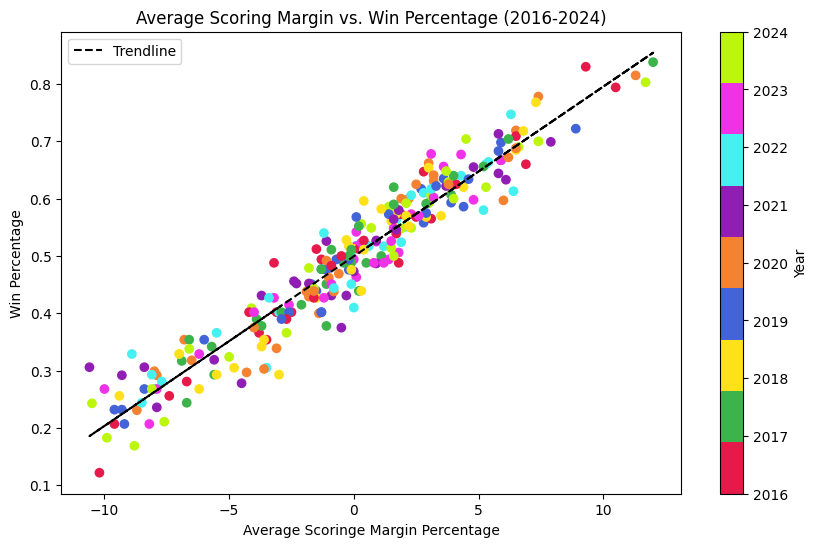

In [32]:
# Filter data for years 2016-2024 (three point revolution)
avg_scr_mgn_data = avg_scr_mgn_data[avg_scr_mgn_data['Year'].between(2016, 2024)]

# Create a list of colors for each yeear
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(avg_scr_mgn_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(avg_scr_mgn_data['Year'].unique()))}
avg_scr_mgn_data['year_color'] = avg_scr_mgn_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    avg_scr_mgn_data['avg scoring margin'], 
    avg_scr_mgn_data['win_pct'], 
    c=avg_scr_mgn_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(avg_scr_mgn_data['avg scoring margin'], avg_scr_mgn_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(avg_scr_mgn_data['avg scoring margin'], p(avg_scr_mgn_data['avg scoring margin']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Average Scoringe Margin Percentage')
plt.ylabel('Win Percentage')
plt.title('Average Scoring Margin vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to beter see the trendline
plt.legend()
plt.show()